In [2]:
from data_preporation_field_scale import field_scale
import geopandas as gpd
import ee
ee.Initialize()


In [3]:
%load_ext autoreload
%autoreload 2


In [4]:
begin = '2020-10-15'
end =  '2021-10-15'
two_fields = gpd.read_file('vector_data/archangelskoe_TWO_FIELDS_WGS84.geojson')
region_of_interest = gpd.read_file('vector_data/our_fields_for_animation.geojson')


,type,geometry
0,PP,"MULTIPOLYGON (((44.18603 44.55178, 44.17179 44..."
1,TT,"MULTIPOLYGON (((44.17340 44.53602, 44.16312 44..."


In [10]:
anual_collection = field_scale(begin, end ,two_fields,region_of_interest)

In [12]:
anual_collection.get_NDVI_by_ROIs()

Generating URL ...
Please wait ...
Data downloaded to c:\Users\User\Google Диск\python_notebooks\total_archangelskiy\field_scale\anual_data\NDVI\row_data.csv


  Местное время в Буденновске     T     Po      P   Pa     U  \
0            15.10.2021 21:00  10.7  753.0  765.5 -0.5  71.0   
1            15.10.2021 18:00  14.2  753.5  765.8 -0.3  61.0   
2            15.10.2021 15:00  19.9  753.8  765.9 -1.1  42.0   
3            15.10.2021 12:00  18.4  754.9  767.1 -0.9  54.0   
4            15.10.2021 09:00  13.3  755.8  768.2 -0.1  77.0   
5            15.10.2021 06:00   9.2  755.9  768.5  0.2  92.0   
6            15.10.2021 03:00  10.3  755.7  768.2 -0.1  95.0   
7            15.10.2021 00:00  10.7  755.8  768.4 -0.5  95.0   
8            14.10.2021 21:00  13.2  756.3  768.7  0.8  89.0   
9            14.10.2021 18:00  17.5  755.5  767.7  1.2  69.0   

                                       DD   Ff  ff10  ff3  ...  \
0                  Ветер, дующий с севера  2.0   NaN  NaN  ...   
1     Ветер, дующий с востоко-юго-востока  1.0   NaN  NaN  ...   
2  Ветер, дующий с востоко-северо-востока  4.0   NaN  NaN  ...   
3                 Ветер, дующий

(           date  mean_temperature  sum_percepetation   snow
 0    01.01.2021            1.6125                0.2  0.125
 1    01.02.2021            2.7375                0.0  0.000
 2    01.03.2021            2.5500                0.7  0.000
 3    01.04.2021            7.1625                0.0  0.000
 4    01.05.2021           17.0500                0.0  0.000
 ..          ...               ...                ...    ...
 361  31.05.2021           21.0500                0.0  0.000
 362  31.07.2021           27.6125                0.0  0.000
 363  31.08.2021           26.2250                0.0  0.000
 364  31.10.2020           14.3500                0.3  0.000
 365  31.12.2020            0.9250                0.2  0.250
 
 [366 rows x 4 columns],
 <Figure size 720x432 with 2 Axes>)

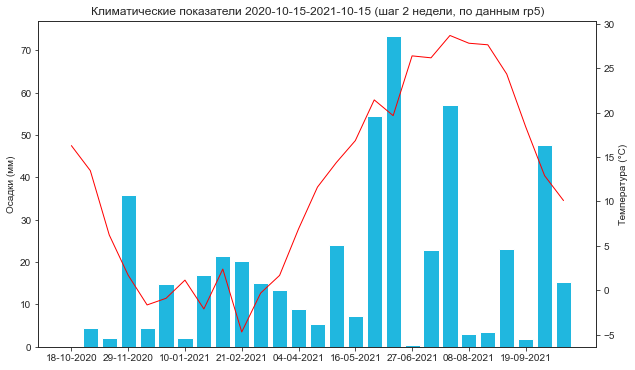

In [19]:
anual_collection.anual_weather(plot_data = "no")

In [24]:
anual_collection.get_collection()

Generating URL ...
Please wait ...
Data downloaded to c:\Users\User\Google Диск\python_notebooks\total_archangelskiy\field_scale\raster_data\Field_scale_sentinel2_2020-10-16_scene.tif
Generating URL ...
Please wait ...
Data downloaded to c:\Users\User\Google Диск\python_notebooks\total_archangelskiy\field_scale\raster_data\Field_scale_sentinel2_2020-10-21_scene.tif
Generating URL ...
Please wait ...
Data downloaded to c:\Users\User\Google Диск\python_notebooks\total_archangelskiy\field_scale\raster_data\Field_scale_sentinel2_2020-10-26_scene.tif
Generating URL ...
Please wait ...
Data downloaded to c:\Users\User\Google Диск\python_notebooks\total_archangelskiy\field_scale\raster_data\Field_scale_sentinel2_2020-11-25_scene.tif
Generating URL ...
Please wait ...
Data downloaded to c:\Users\User\Google Диск\python_notebooks\total_archangelskiy\field_scale\raster_data\Field_scale_sentinel2_2021-01-19_scene.tif
Generating URL ...
Please wait ...
Data downloaded to c:\Users\User\Google Диск\

In [149]:
from visualisation_scripts import start, get_maps
from rasterio.plot import  show, adjust_band
import rasterio
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
from rasterio.mask import mask 
import pandas as pd 
import numpy as np
from scipy.stats import kruskal

In [147]:
directory = "Field_scale_sentinel2_2021-09-21_scene.tif"
raster_name = directory
directory = "raster_data/"
directory += raster_name

Date = raster_name.split('_')[3]



dataset = rasterio.open(directory)
image = dataset.read()

NDVI_NDTI_df = pd.DataFrame()
for i in ROIs['type'].unique():
    df, _ = mask(dataset, ROIs[ROIs['type'] == i].geometry,nodata=np.nan, invert=False)
    _df = df[6:8].reshape(2,-1)
    _df = _df.T[~np.isnan(_df.T).any(axis=1)]

    _df = pd.DataFrame(data= _df, columns= ['NDVI', "NDTI"])
    _df['type'] = i
    _df['date'] = Date
    NDVI_NDTI_df = NDVI_NDTI_df.append(_df)


Text(0.2, 0.4, '        NDTI\nKruskal-Wallis\n H-test = 0.0\n    α = 0.05')

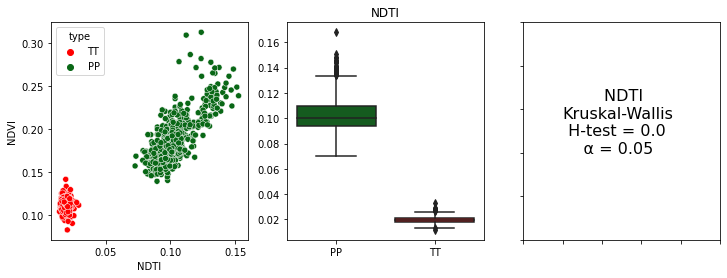

In [260]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='test',  colors=['red','white','green','white','red'])

colors = ["#FF0000" ,"#096716"]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4)) 
sns.scatterplot(data = NDVI_NDTI_df.sample(1000), x = 'NDTI', y = 'NDVI',hue = 'type',palette= sns.color_palette(colors), ax = ax1)

colors.reverse()
sns.boxplot(data = NDVI_NDTI_df.sample(1000),x = 'type' ,y = 'NDTI' ,order = ['PP','TT'], palette= sns.color_palette(colors), ax = ax2)
ax2.set(xlabel=None, ylabel = None, title = 'NDTI')

pp = NDVI_NDTI_df.NDTI[NDVI_NDTI_df['type'] == 'PP'].values
tt = NDVI_NDTI_df.NDTI[NDVI_NDTI_df['type'] == 'TT'].values
test_result = kruskal(pp, tt)[1]

ax3.set(xlabel=None, ylabel = None)  # remove the axis label
ax3.set(xticklabels=[], yticklabels=[])  
ax3.text(0.2,0.4, f"        NDTI\nKruskal-Wallis\n H-test = {test_result}\n    \u03B1 = 0.05", fontsize  = 16)



In [222]:
f"Kruskal-Wallis H-test - {test_result}"

'Kruskal-Wallis H-test - 0.0'

In [211]:
pp = NDVI_NDTI_df.NDTI[NDVI_NDTI_df['type'] == 'PP'].values
tt = NDVI_NDTI_df.NDTI[NDVI_NDTI_df['type'] == 'TT'].values

In [273]:
start(ROIs, 'sen-2')

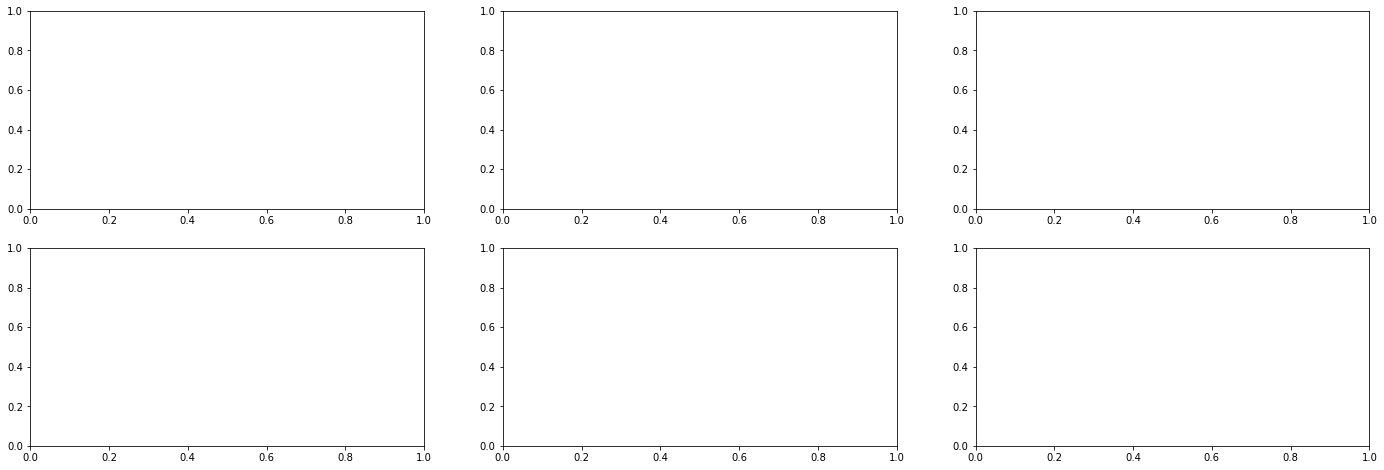

In [267]:
fig, axes = plt.subplots(2,3, figsize=(24,8)) 


In [271]:
axes[2,2]

IndexError: index 2 is out of bounds for axis 0 with size 2